In [1]:
%config IPCompleter.greedy=True
import lmdb
import os
import csv
import pickle
from matplotlib import pyplot as plt
import numpy as np #il faut enlever np
#import matplotlib.pyplot as plt, mpld3
from matplotlib import style
from math import sqrt

In [2]:
path_file = "2014-01 - Citi Bike trip data.csv"
chunk_size = 100
lmdb_database = lmdb.open('bike_db', map_size = 2 ** 30)

In [3]:
row = [
        "tripduration","starttime","stoptime","start station id","start station name",
        "start station latitude","start station longitude",
        "end station id","end station name",
        "end station latitude","end station longitude"
        ]

In [4]:
with open(path_file) as csv_file:
    reader = csv.reader(csv_file)
    next(reader)
    line_number = 1
    with lmdb_database.begin(write = True) as txn:
        for row in reader :
            notBinaryObject = row[0:11]
            txn.put(pickle.dumps(line_number), pickle.dumps(notBinaryObject))
            line_number = line_number + 1
            if(line_number == 100000) : 
                break
            #break
        print(line_number)

100000


In [5]:
with lmdb_database.begin() as txn:
    cursor = txn.cursor()
    plt.rcParams['figure.figsize'] = (16, 9)
    plt.style.use('ggplot')
    data = [] #initialisation d'un tableau pour tester un kmeans avec les start long et lat 
    for key, value in cursor:
        data.append([pickle.loads(value)[6],pickle.loads(value)[7]])
    print(data[0])

['-73.99510132', '438']


In [6]:
#with open(path_file) as csv_file:
#    reader = csv.reader(csv_file)
#    next(reader)
#    data = [r for r in reader]
#    print(data[0][0:11])
#    print(pickle.dumps(data[0][0:11]))

In [7]:
#DEBUG fini

#================================================================================================================
#
#                                                K MEANS CLUSTERING
#
#================================================================================================================

style.use('ggplot')

class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 100):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def Euclidean_distance(self, feat_one, feat_two):

        squared_distance = 0
        #Assuming correct input to the function where the lengths of two features are the same

        for i in range(len(feat_one)):
                squared_distance += (feat_one[i] - feat_two[i])**2

        ed = sqrt(squared_distance)
        return ed;

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

        #find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [self.Euclidean_distance(features,self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
                #il faut remplacer np

            isOptimal = True

            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                
                #il faut remplacer np
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    def pred(self, data):
        distances = [Euclidean_distance(data,self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    

In [8]:
km = K_Means(3)
dataNumeric = [[float(tuple[0]),float(tuple[1])] for tuple in data]
km.fit(dataNumeric)
print(km)


KeyboardInterrupt: 

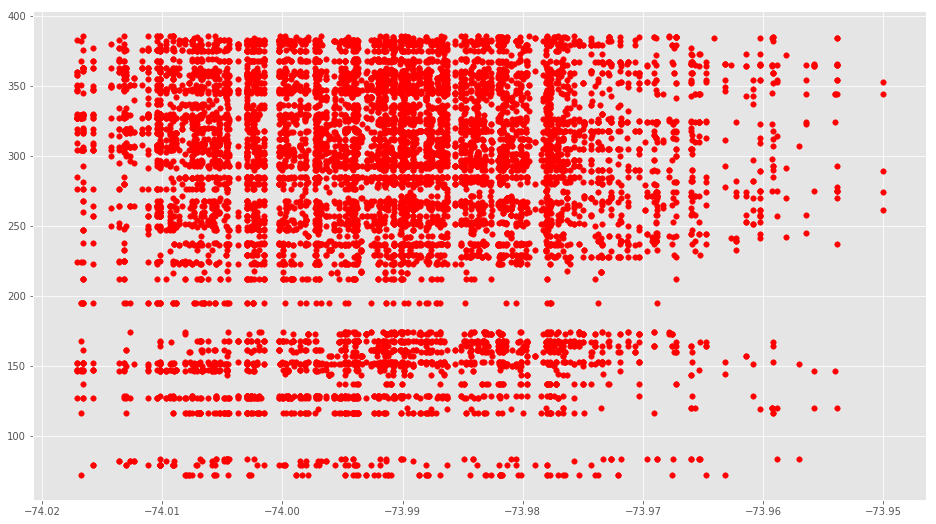

In [9]:
# plotting takes forever becuase of the number of points. However, it's working if you're patient enough.
colors = 10*["r", "g", "c", "b", "k"]

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color = color,s = 30)
            
    mpld3.show()


In [ ]:
dataNumeric = [[float(tuple[0]),float(tuple[1])] for tuple in data]
dataNumeric

In [10]:
km.centroids

{0: array([-73.99159403, 279.32724685]),
 1: array([ -73.99127422, 2112.36375965]),
 2: array([-73.98876423, 474.50584563])}